In [ ]:
#Title & Desc Here

In [1]:
import glob
import os
import math
import torch
import random
import pandas as pd
import numpy as np


def sortKeyFunc(s):
    return int(os.path.basename(s)[12:-4])

def df_rows_to_vectors(df):
    vectors = []
    for rows in range(len(df)):
        row = df.iloc[rows]
        vectors.append(row.values)
        
    return vectors

def split_list_on_ratio(liste, ratio, shuffle=False, random_seed=42):
    len_list = len(liste)
    if shuffle:
        random.seed(seed)
        random.shuffle(liste)
    
    index_where_to_split = math.floor(len_list * ratio)

    list_part_a = liste[:index_where_to_split]
    list_part_b = liste[index_where_to_split:]
    
    return list_part_a, list_part_b

def bomb_csv_to_df(csv_stringLoader):
    list_df = []
    list_data_units = []
    list_data_label_type = []
    allFiles = sorted(glob.glob(csv_stringLoader), key=sortKeyFunc)

    for files in allFiles:
        print('Loading:{}'.format(files))
        df = pd.read_csv(files)
        df = df.drop('Description', axis=1)
        df = df.set_index('TIME OF DAY IN SECONDS')

        data_units = df.iloc[0]
        data_units.name = 'Unit'

        data_label_type = df.iloc[1]
        data_label_type.name = 'Type'

        df = df.iloc[3:].reset_index()
        
        list_df.append(df)
        list_data_units.append(data_units)
        list_data_label_type.append(data_label_type)
        
    return list_df, list_data_units, list_data_label_type

#TODO: Func to verify if list_data_units and list_data_label_type are all the same

#purely exogeneous (non-regressive)
def list_df_to_exogeneous_df(list_df, target_choice):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list]
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#purely endogenous (non-autoregressive)
#to verify if the model can learn copying data
def list_df_to_endogeneous_df(list_df, target_choice):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list]
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#exogeneous & endogenous (non-autoregressive)
#to verify if the model can learn copying data with more data
def list_df_to_endo_exo_df(list_df, target_choice):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow'] + ['2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list]
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#forecasting (endogeneous)
def list_df_forecasting_endo_df(list_df, target_choice, shift_delta=1):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list].shift(-shift_delta)
        
        df_features = df_features.drop(df_features.tail(shift_delta).index)
        df_targets = df_targets.drop(df_targets.tail(shift_delta).index)
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#forecasting (exogeneous)
def list_df_forecasting_exo_df(list_df, target_choice, shift_delta=1):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list].shift(-shift_delta)
        
        df_features = df_features.drop(df_features.tail(shift_delta).index)
        df_targets = df_targets.drop(df_targets.tail(shift_delta).index)
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#forecasting (endogeneous & exogeneous)
def list_df_forecasting_endo_exo_df(list_df, target_choice, shift_delta=1):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow'] + ['2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list].shift(-shift_delta)
        
        df_features = df_features.drop(df_features.tail(shift_delta).index)
        df_targets = df_targets.drop(df_targets.tail(shift_delta).index)
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

In [2]:
def list_df_to_contiguous_sliding_windows_arrays(list_df, window_size, rem_beg=True):
    all_windows = []
    for dfs in list_df:
        windows = df_to_contiguous_sliding_windows_arrays(dfs, window_size, rem_beg=True)
        all_windows.extend(windows)
    return all_windows

def df_to_contiguous_sliding_windows_arrays(df, window_size, rem_beg=True):
    amount_to_remove = len(df)%window_size
    if rem_beg:
        df_rem = remove_df_starting_rows(df, amount_to_remove)
    elif not rem_beg:
        df_rem = remove_df_ending_rows(df, amount_to_remove)
    
    rows = []
    windows = []
    for index, row in df_rem.iterrows():
        rows.append(row.values.tolist())
        if len(rows)==window_size:
            windows.append(rows)
            rows = []
    return windows

def list_df_to_overlapping_sliding_windows_arrays(list_df, window_size):
    all_windows = []
    for dfs in list_df:
        windows = df_to_overlapping_sliding_windows_arrays(dfs, window_size)
        all_windows.extend(windows)
    return all_windows

def df_to_overlapping_sliding_windows_arrays(dataframe, window_size):
    values_array = dataframe.values                 
    s0, s1 = values_array.strides
    row, col = values_array.shape
    windows = np.lib.stride_tricks.as_strided(values_array, shape=(row-window_size+1, window_size, col), strides=(s0, s0, s1))
    return windows

def remove_df_starting_rows(dataframe, amount_to_remove):
    if amount_to_remove > 0:
        df = dataframe.iloc[amount_to_remove:]                 
        return df
    else:
        return dataframe

def remove_df_ending_rows(dataframe, amount_to_remove):
    if amount_to_remove > 0:
        df = dataframe.iloc[:-amount_to_remove]                 
        return df
    else:
        return dataframe

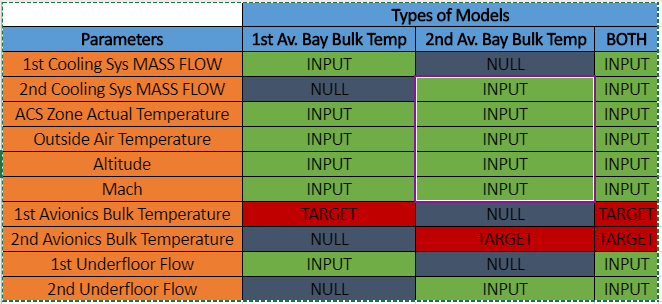

In [3]:
from IPython.display import Image
Image("../DataBombardier/data_input_targets.PNG")

In [4]:
csv_stringLoader = "../DataBombardier/flight_test_*.csv"
list_df, list_data_units, list_data_label_type = bomb_csv_to_df(csv_stringLoader)

Loading:../DataBombardier\flight_test_1.csv
Loading:../DataBombardier\flight_test_2.csv
Loading:../DataBombardier\flight_test_3.csv
Loading:../DataBombardier\flight_test_4.csv
Loading:../DataBombardier\flight_test_5.csv
Loading:../DataBombardier\flight_test_6.csv
Loading:../DataBombardier\flight_test_7.csv
Loading:../DataBombardier\flight_test_8.csv
Loading:../DataBombardier\flight_test_9.csv
Loading:../DataBombardier\flight_test_10.csv
Loading:../DataBombardier\flight_test_11.csv
Loading:../DataBombardier\flight_test_12.csv
Loading:../DataBombardier\flight_test_13.csv


In [5]:
list_df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9260 entries, 0 to 9259
Data columns (total 11 columns):
TIME OF DAY IN SECONDS         9260 non-null object
1st Cooling Sys MASS FLOW      9260 non-null object
2nd Cooling Sys MASS FLOW      9260 non-null object
ACS_Zone_Actual_Temperature    9260 non-null object
Outside Air Temperature_OAT    9260 non-null object
Pressure Altitude              9260 non-null object
Mach                           9260 non-null object
1st AVIONICS BAY BULK TEMP     9260 non-null object
2nd AVIONICS BAY BULK TEMP     9260 non-null object
1st Underfloor flow            9260 non-null object
2nd Underfloor flow            9260 non-null object
dtypes: object(11)
memory usage: 795.9+ KB


In [6]:
list_df[0].head()

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
0,17902,5.119134,17.831211,29.709884,26.150728,2365.0,0.008851,35.240755,33.76746076717663,8.652254,15.141995
1,17904,5.129402,17.793621,29.709884,26.17243,2364.0,0.008205,35.250933,33.78781427556584,8.712825,15.125606
2,17906,5.144212,17.751606,29.623075,26.194133,2365.0,0.008917,35.233968,33.77085186112588,8.806761,15.103295
3,17908,5.146977,17.708962,29.623075,26.194133,2364.0,0.009194,35.244148,33.78781427556584,8.886403,15.09978
4,17910,5.144015,17.684005,29.623075,26.183282,2364.0,0.005896,35.227183,33.79120814739258,8.932443,15.097211


In [7]:
list_df[0].tail()

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
9255,36412,5.595042,11.954343,23.372851,23.882852,1722.0,0.009669,23.765409,24.285066219590515,9.544755,16.576988
9256,36414,5.584774,11.967294,23.372851,23.850299,1721.0,0.006147,23.79934,24.264711322262556,9.545623,16.560837
9257,36416,5.572925,11.968559,23.372851,23.850299,1723.0,0.011186,23.79934,24.254533179129204,9.541279,16.553018
9258,36418,5.561867,11.968874,23.372851,23.839447,1723.0,0.00955,23.785768,24.24435503599585,9.537369,16.551794
9259,36420,5.551401,11.978351,23.372851,23.828596,1722.0,0.007862,23.78916,24.26810380515055,9.535671,16.556848


In [8]:
#test of exogenous (not forecasting)

In [9]:
target_choice = 1

list_df_features, list_df_targets = list_df_to_exogeneous_df(list_df, target_choice)

In [10]:
list_df_targets[0].head()

,1st AVIONICS BAY BULK TEMP
0,35.240755
1,35.250933
2,35.233968
3,35.244148
4,35.227183


In [11]:
#Testing df rows to contiguous windows

In [12]:
dff = list_df_features[0].head(8)
dff

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st Underfloor flow
0,17902,5.119134,29.709884,26.150728,2365.0,0.008851,8.652254
1,17904,5.129402,29.709884,26.17243,2364.0,0.008205,8.712825
2,17906,5.144212,29.623075,26.194133,2365.0,0.008917,8.806761
3,17908,5.146977,29.623075,26.194133,2364.0,0.009194,8.886403
4,17910,5.144015,29.623075,26.183282,2364.0,0.005896,8.932443
5,17912,5.143818,29.536267,26.183282,2364.0,0.005896,8.925179
6,17914,5.148952,29.536267,26.183282,2364.0,0.007862,8.876059
7,17916,5.159615,29.623075,26.194133,2364.0,0.008218,8.819081


In [13]:
#we have to remove the extras rows (the remainder of the division of longueur/window_size)
#so far, we have methods to remove the starting rows or the ending rows

In [14]:
window_size = 3
amount_to_remove = len(dff)%window_size
amount_to_remove

2

In [15]:
df_rem_end = remove_df_ending_rows(dff, amount_to_remove)
df_rem_end

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st Underfloor flow
0,17902,5.119134,29.709884,26.150728,2365.0,0.008851,8.652254
1,17904,5.129402,29.709884,26.17243,2364.0,0.008205,8.712825
2,17906,5.144212,29.623075,26.194133,2365.0,0.008917,8.806761
3,17908,5.146977,29.623075,26.194133,2364.0,0.009194,8.886403
4,17910,5.144015,29.623075,26.183282,2364.0,0.005896,8.932443
5,17912,5.143818,29.536267,26.183282,2364.0,0.005896,8.925179


In [16]:
df_rem_start = remove_df_starting_rows(dff, amount_to_remove)
df_rem_start

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st Underfloor flow
2,17906,5.144212,29.623075,26.194133,2365.0,0.008917,8.806761
3,17908,5.146977,29.623075,26.194133,2364.0,0.009194,8.886403
4,17910,5.144015,29.623075,26.183282,2364.0,0.005896,8.932443
5,17912,5.143818,29.536267,26.183282,2364.0,0.005896,8.925179
6,17914,5.148952,29.536267,26.183282,2364.0,0.007862,8.876059
7,17916,5.159615,29.623075,26.194133,2364.0,0.008218,8.819081


In [17]:
#with the df with removed rows, we create contiguous windows by iterating through the df rows.

In [18]:
window_size = 2
windows = df_to_contiguous_sliding_windows_arrays(dff, window_size, rem_beg=True)
windows[:]

[[['17902',
   '5.119134',
   '29.709884',
   '26.150728',
   '2365.0',
   '0.008851',
   '8.652254'],
  ['17904',
   '5.129402',
   '29.709884',
   '26.17243',
   '2364.0',
   '0.008205',
   '8.712825']],
 [['17906',
   '5.144212',
   '29.623075',
   '26.194133',
   '2365.0',
   '0.008917',
   '8.806761'],
  ['17908',
   '5.146977',
   '29.623075',
   '26.194133',
   '2364.0',
   '0.009194',
   '8.886403']],
 [['17910',
   '5.144015',
   '29.623075',
   '26.183282',
   '2364.0',
   '0.005896',
   '8.932443'],
  ['17912',
   '5.143818',
   '29.536267',
   '26.183282',
   '2364.0',
   '0.005896',
   '8.925179']],
 [['17914',
   '5.148952',
   '29.536267',
   '26.183282',
   '2364.0',
   '0.007862',
   '8.876059'],
  ['17916',
   '5.159615',
   '29.623075',
   '26.194133',
   '2364.0',
   '0.008218',
   '8.819081']]]

In [19]:
#Testing list of df rows to contiguous windows

In [20]:
window_size = 7
all_windows = list_df_to_contiguous_sliding_windows_arrays(list_df, window_size, rem_beg=True)
all_windows

[[['17914',
   '5.148952',
   '17.708329',
   '29.536267',
   '26.183282',
   '2364.0',
   '0.007862',
   '35.196643',
   '33.75049557485917',
   '8.876059',
   '15.154154'],
  ['17916',
   '5.159615',
   '17.718437',
   '29.623075',
   '26.194133',
   '2364.0',
   '0.008218',
   '35.227183',
   '33.75049557485917',
   '8.819081',
   '15.178833'],
  ['17918',
   '5.16238',
   '17.708962',
   '29.623075',
   '26.204984',
   '2365.0',
   '0.011357',
   '35.186465',
   '33.73014137200059',
   '8.752231',
   '15.1705'],
  ['17920',
   '5.159418',
   '17.704222',
   '29.536267',
   '26.204984',
   '2365.0',
   '0.00988',
   '35.193252',
   '33.70639190837651',
   '8.669036',
   '15.159365'],
  ['17922',
   '5.155864',
   '17.711172',
   '29.449458',
   '26.204984',
   '2364.0',
   '0.007809',
   '35.193252',
   '33.713178957560615',
   '8.617191',
   '15.137289'],
  ['17924',
   '5.153296',
   '17.708962',
   '29.362649',
   '26.204984',
   '2364.0',
   '0.007928',
   '35.223789',
   '33.72

In [21]:
len(all_windows)

23046

In [22]:
len(all_windows[0])

7

In [23]:
len(all_windows[0][0])

11

In [24]:
#Testing df rows to overlapping windows

In [25]:
dff = list_df_features[0].head(20)

In [26]:
dff

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st Underfloor flow
0,17902,5.119134,29.709884,26.150728,2365.0,0.008851,8.652254
1,17904,5.129402,29.709884,26.17243,2364.0,0.008205,8.712825
2,17906,5.144212,29.623075,26.194133,2365.0,0.008917,8.806761
3,17908,5.146977,29.623075,26.194133,2364.0,0.009194,8.886403
4,17910,5.144015,29.623075,26.183282,2364.0,0.005896,8.932443
5,17912,5.143818,29.536267,26.183282,2364.0,0.005896,8.925179
6,17914,5.148952,29.536267,26.183282,2364.0,0.007862,8.876059
7,17916,5.159615,29.623075,26.194133,2364.0,0.008218,8.819081
8,17918,5.16238,29.623075,26.204984,2365.0,0.011357,8.752231
9,17920,5.159418,29.536267,26.204984,2365.0,0.00988,8.669036


In [27]:
val = dff.values
val.shape

(20, 7)

In [28]:
window_size = 4
windows = df_to_overlapping_sliding_windows_arrays(dff, window_size)

In [29]:
#shape is (a, b, c) where a=longueur(df)-window_size+1 b=window_size and c=largeur features
#index on a is for the windows, index on b is for the timesteps in each window, index on c is for the features of the timestep
windows.shape

(17, 4, 7)

In [30]:
windows[0]

array([['17902', '5.119134', '29.709884', '26.150728', '2365.0',
        '0.008851', '8.652254'],
       ['17904', '5.129402', '29.709884', '26.17243', '2364.0',
        '0.008205', '8.712825'],
       ['17906', '5.144212', '29.623075', '26.194133', '2365.0',
        '0.008917', '8.806761'],
       ['17908', '5.146977', '29.623075', '26.194133', '2364.0',
        '0.009194', '8.886403']], dtype=object)

In [31]:
#for the targets, we need to remove the initial X rows where x=window_size-1

In [32]:
dft = list_df_targets[0].head(12)
dft

,1st AVIONICS BAY BULK TEMP
0,35.240755
1,35.250933
2,35.233968
3,35.244148
4,35.227183
5,35.261114
6,35.196643
7,35.227183
8,35.186465
9,35.193252


In [33]:
amount_to_remove = window_size-1
dft_rem = remove_df_starting_rows(dft, amount_to_remove)
dft_rem

,1st AVIONICS BAY BULK TEMP
3,35.244148
4,35.227183
5,35.261114
6,35.196643
7,35.227183
8,35.186465
9,35.193252
10,35.193252
11,35.223789


In [34]:
#Testing list of df rows to overlapping windows

In [35]:
window_size = 4 
all_windows = list_df_to_overlapping_sliding_windows_arrays(list_df, window_size)
all_windows

[array([['17902', '5.119134', '17.831211', '29.709884', '26.150728',
         '2365.0', '0.008851', '35.240755', '33.76746076717663',
         '8.652254', '15.141995'],
        ['17904', '5.129402', '17.793621', '29.709884', '26.17243',
         '2364.0', '0.008205', '35.250933', '33.78781427556584',
         '8.712825', '15.125606'],
        ['17906', '5.144212', '17.751606', '29.623075', '26.194133',
         '2365.0', '0.008917', '35.233968', '33.77085186112588',
         '8.806761', '15.103295'],
        ['17908', '5.146977', '17.708962', '29.623075', '26.194133',
         '2364.0', '0.009194', '35.244148', '33.78781427556584',
         '8.886403', '15.09978']], dtype=object),
 array([['17904', '5.129402', '17.793621', '29.709884', '26.17243',
         '2364.0', '0.008205', '35.250933', '33.78781427556584',
         '8.712825', '15.125606'],
        ['17906', '5.144212', '17.751606', '29.623075', '26.194133',
         '2365.0', '0.008917', '35.233968', '33.77085186112588',
        

In [36]:
len(all_windows)

161322

In [37]:
len(all_windows[0])

4

In [38]:
len(all_windows[0][0])

11